In [1]:
import yaml
import time
import random
import numpy as np
import torch
from torch.utils.tensorboard import SummaryWriter
import time
from envs.photo_env import PhotoEnhancementEnv
from sac.sac_algorithm import SAC
import multiprocessing as mp
try:
    mp.set_start_method('spawn', force=True)
except RuntimeError:
    pass  


Encoding testing data ...


  0%|          | 0/4 [00:00<?, ?it/s]

finished...
Encoding training data ...


  0%|          | 0/36 [00:00<?, ?it/s]

finished...


In [2]:
env = PhotoEnhancementEnv()

In [3]:
with open("configs/hyperparameters.yaml") as f:
    config_dict =yaml.load(f, Loader=yaml.FullLoader)
    
class Config(object):
    def __init__(self, dictionary):
        self.__dict__.update(dictionary)
sac_config = Config(config_dict)

SEED = sac_config.seed
DEVICE= 'CUDA'

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = sac_config.torch_deterministic

In [4]:
run_name = f"{sac_config.exp_name}__{sac_config.seed}__{int(time.time())}"
writer = SummaryWriter(f"runs/{run_name}")
writer.add_text(
    "hyperparameters",
    "|param|value|\n|-|-|\n%s" % ("\n".join([f"|{key}|{value}|" for key, value in vars(sac_config).items()])),
)
agent = SAC(env,sac_config,writer)

(64, 12) -12


In [5]:
agent.start_time = time.time()
for i in range(sac_config.total_timesteps):
    episode_count = 0
    
    agent.reset_env()
    envs_mean_rewards =[]
    while True:     
        episode_count+=1
        agent.global_step+=1
        mean_reward,batch_dones = agent.train()
        envs_mean_rewards.append(mean_reward)
        if(batch_dones==True).any():
            print('one done')
            print(agent.state.shape,agent.env.sub_env_running.shape)
            print(agent.env.sub_env_running)
        if (batch_dones==True).all()==True or episode_count==sac_config.max_episode_timesteps:
            ens_mean_episodic_return = sum(envs_mean_rewards)
            if agent.global_step % 100 == 0:
                agent.writer.add_scalar("charts/episodic_return", ens_mean_episodic_return, agent.global_step)
                envs_mean_rewards =[]
            episode_count=0           
            agent.reset_env()
            break     

SPS: 1
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
SPS: 2
one done
torch.Size([63, 1024]) torch.Size([63])
tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
        37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
        55, 56, 57, 58, 59, 60, 61, 62, 63], dtype=torch.int32)
SPS: 2
SPS: 2
SPS: 2
SPS: 2
one done
torch.Size([63, 1024]) torch.Size([63])
tensor([ 0,  1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23, 

KeyboardInterrupt: 

In [6]:
agent.global_step

20009

In [108]:
import cv2
import torch
import matplotlib.pyplot as plt
source_image = cv2.imread("sample_images/a0001-jmac_DSC1459.jpg")
target_image = cv2.imread("sample_images/a0676-kme_609_C.jpg")
source_image = cv2.cvtColor(source_image, cv2.COLOR_BGR2RGB) 
target_image = cv2.cvtColor(target_image, cv2.COLOR_BGR2RGB) 
source_image = cv2.resize(source_image, (64, 64)) / 255.0
target_image = cv2.resize(target_image, (64, 64)) / 255.0

input = torch.Tensor(source_image).permute(2,0,1).unsqueeze(0)

enhanced_image = input.clone()

In [35]:
input.shape

(64, 64, 3)

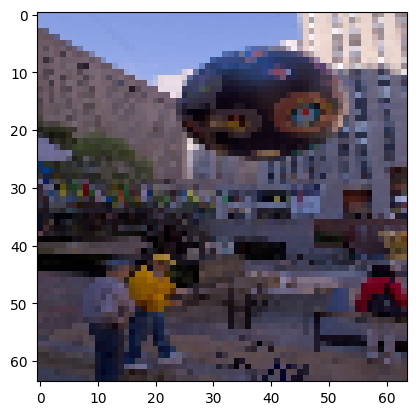

In [109]:
plt.imshow(target_image)

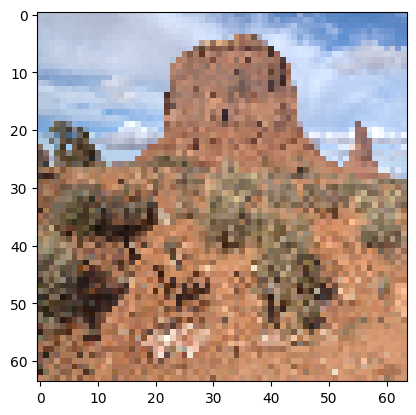

In [110]:
plt.imshow(source_image)

In [111]:
from envs.features_extractor import ResnetEncoder
from envs.new_edit_photo import PhotoEditor
import matplotlib.pyplot as plt
photo_editor = PhotoEditor()
image_encoder = ResnetEncoder()

In [101]:
agent.global_step

20009

In [112]:
encoded_source = image_encoder.encode(input)
original_64 = input.permute(0,2,3,1)
original_image = torch.Tensor(source_image).unsqueeze(0)

In [ ]:
param = torch.tensor([0.125, 0.125, 0.375, 0.125, 0., 0.0625, 0.9375, 0.375, 0.0625, 0., 0.125, 0.125]).unsqueeze(0)

In [113]:
enhanced_image=enhanced_image.permute(0,2,3,1)

In [120]:
for i in range(1):
    with torch.no_grad():
        encoded_enhanced = image_encoder.encode(enhanced_image.permute(0,3,1,2))
        encoded_input = torch.cat([encoded_source,encoded_enhanced],dim=1)
        parameters = agent.actor.get_action(encoded_input)
        enhanced_image = photo_editor(original_64.cpu(),parameters[0].cpu())
enhanced_image_512 = photo_editor(original_image.cpu(),parameters[0].cpu())
parameters

(tensor([[-0.4093,  0.9322,  0.9479, -0.9823,  0.9816, -0.9015,  0.3370,  0.9441,
          -0.9358,  0.9890,  0.9758, -0.9620]], device='cuda:0'),
 tensor([[15.3851]], device='cuda:0'),
 tensor([[-0.8766,  0.9491,  0.9208, -0.9627,  0.9272, -0.9294, -0.7929,  0.9514,
          -0.8700,  0.9472,  0.8494, -0.9549]], device='cuda:0'))

In [58]:
enhanced_image.shape

torch.Size([1, 64, 64, 3])

In [ ]:
enhanced =torch.flatten(enhanced_image_512.clone(),start_dim=1, end_dim=-1)
target = torch.flatten(original_image.clone(),start_dim=1, end_dim=-1)

rmse = enhanced-target
rmse = torch.pow(rmse,2).mean(1)

In [ ]:
rmse

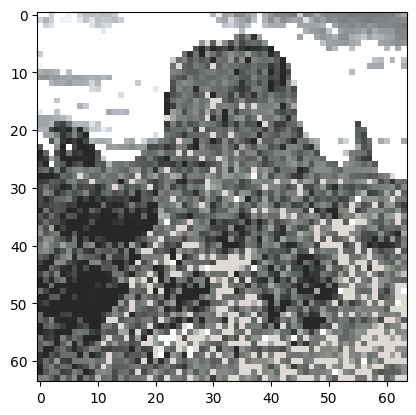

In [121]:
plt.imshow(enhanced_image_512[0])